# G Logistic regression MNIST

- Evalute logistic regression as B and D on MNIST

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

In [2]:
mnist = tf.keras.datasets.mnist.load_data()
X_train = mnist[0][0]
Y_train = mnist[0][1]

X_test = mnist[0][0]
Y_test = mnist[0][1]

In [3]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]

m = 28*28

X_train = X_train.reshape(n_train, m)
X_test = X_test.reshape(n_test, m)

In [16]:
logisticReg = LogisticRegression(solver = 'lbfgs')
logisticReg.fit(X_train, Y_train)

C:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\anaconda

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

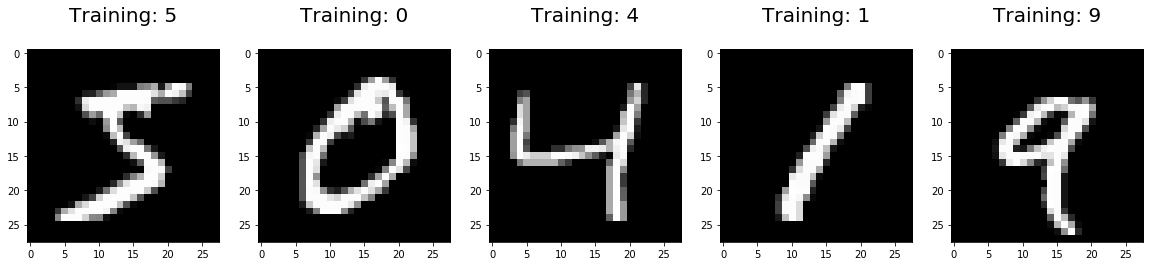

In [18]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], Y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [21]:
predictions = logisticReg.predict(X_train)
print(predictions[:5])

[5 0 4 1 9]


In [30]:
# The score method uses the f1_score to calculate
score = logisticReg.score(X_train, Y_train)
print(score)

0.9260833333333334


In [25]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(Y_train, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

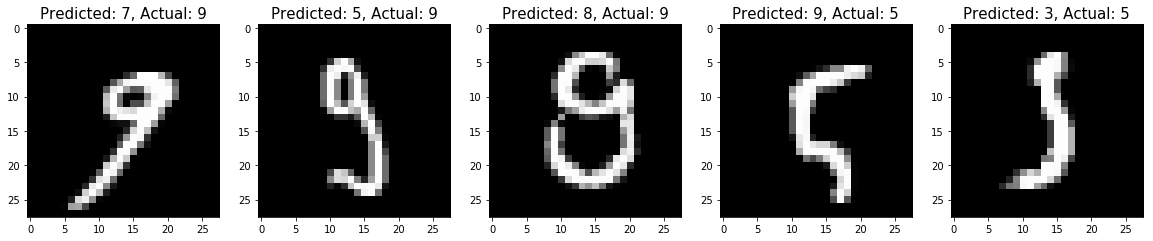

In [26]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_train[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], Y_train[badIndex]), fontsize = 15)

In [28]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5923
           1       0.96      0.98      0.97      6742
           2       0.92      0.91      0.92      5958
           3       0.91      0.90      0.90      6131
           4       0.93      0.94      0.93      5842
           5       0.91      0.87      0.89      5421
           6       0.95      0.96      0.96      5918
           7       0.94      0.94      0.94      6265
           8       0.86      0.88      0.87      5851
           9       0.89      0.90      0.90      5949

   micro avg       0.93      0.93      0.93     60000
   macro avg       0.93      0.92      0.92     60000
weighted avg       0.93      0.93      0.93     60000

